# Data Wrangling

- [Exploring 2020 Tornado and Weather Data](#chapter1)
     - [Exploring US Tornado Data](#chapter1.1) 
     - [Exploring Mississippi Weather Data](#chapter1.2) 
- [Cleaning Mississippi Tornado and Weather Data](#chapter2) 
    - [Tornado Data](#chapter2.1)
    - [Weather Data](#chapter2.2) 
- [Merging Tornado and Weather Data](#chapter4) 

In this project, I am going to be looking at tornado event data, as well as corresponding weather data. First, I must explore tornado datasets to figure out the best location to focus my analysis.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sin, cos, sqrt, atan2, radians
import datetime as dt
from datetime import timedelta

# Exploring 2020 Tornado and Weather Data <a class="anchor" id="chapter1"></a>

## Exploring US Tornado Data <a class="anchor" id="chapter1.1"></a>

The NOAA website only let's me download files with up to 500 rows at a time, so I need to download 3 seperate files and then combine them into 1.

In [2]:
# import tornado data from 3 seperate CSV files
csv_files = ['/Users/gregoryolson/Documents/Data Science CT/Capstone/Capstone_Tornado/Data/tornados_2020_1.csv', \
             '/Users/gregoryolson/Documents/Data Science CT/Capstone/Capstone_Tornado/Data/tornados_2020_2.csv', \
             '/Users/gregoryolson/Documents/Data Science CT/Capstone/Capstone_Tornado/Data/tornados_2020_3.csv']

# concatenate them into 1 file
tornado_2020 = pd.concat((pd.read_csv(f) for f in csv_files))

# display preview of every column in the dataframe 
pd.set_option('display.max_columns', None)
tornado_2020.head()

,EVENT_ID,CZ_NAME_STR,BEGIN_LOCATION,BEGIN_DATE,BEGIN_TIME,EVENT_TYPE,MAGNITUDE,TOR_F_SCALE,DEATHS_DIRECT,INJURIES_DIRECT,DAMAGE_PROPERTY_NUM,DAMAGE_CROPS_NUM,STATE_ABBR,CZ_TIMEZONE,MAGNITUDE_TYPE,EPISODE_ID,CZ_TYPE,CZ_FIPS,WFO,INJURIES_INDIRECT,DEATHS_INDIRECT,SOURCE,FLOOD_CAUSE,TOR_LENGTH,TOR_WIDTH,BEGIN_RANGE,BEGIN_AZIMUTH,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EVENT_NARRATIVE,EPISODE_NARRATIVE,ABSOLUTE_ROWNUMBER
0,865220,LAKE CO.,OKAHUMPKA,01/04/2020,1029,Tornado,,EF0,0,1,0,0,FL,EST-5,,144137,C,69,MLB,0,0,NWS Storm Survey,,2.38,175,3,WSW,1,NW,OKAHUMPKA,28.7399,-81.9234,28.7589,-81.8907,National Weather Service staff conducted a dam...,A severe thunderstorm moving across central Fl...,1
1,865221,VOLUSIA CO.,BERESFORD,01/04/2020,1126,Tornado,,EF1,0,0,25000,0,FL,EST-5,,144137,C,127,MLB,0,0,NWS Storm Survey,,4.39,265,1,W,1,ESE,DE LAND,29.0023,-81.3514,29.0264,-81.2841,National Weather Service staff conducted a dam...,A severe thunderstorm moving across central Fl...,2
2,874056,LINCOLN CO.,PRAGUE,01/10/2020,1034,Tornado,,EF0,0,0,25000,0,OK,CST-6,,144688,C,81,OUN,0,0,NWS Storm Survey,,1.30,10,0,SW,1,NNE,PRAGUE,35.4864,-96.6952,35.5013,-96.6814,A small tornado developed on the west side of ...,A strong storm system brought an unseasonably ...,3
3,874086,MAYES CO.,MURPHY,01/10/2020,1155,Tornado,,EFU,0,0,0,0,OK,CST-6,,143960,C,97,TSA,0,0,Storm Chaser,,1.00,50,5,SE,5,ESE,MURPHY,36.0991,-95.1771,36.1163,-95.1659,Storm chasers positioned in two different loca...,A strong storm system and associated cold fron...,4
4,872580,CEDAR CO.,MASTERS,01/10/2020,1427,Tornado,,EF1,0,0,0,0,MO,CST-6,,144632,C,39,SGF,0,0,NWS Storm Survey,,0.45,50,3,E,3,ENE,MASTERS,37.6057,-93.6194,37.6110,-93.6147,A National Weather Service survey determined t...,"During the afternoon and evening of the 10th, ...",5


This dataset contains information about every reported tornado in the United States between January 1, 2020 and August 31, 2020. 

In [3]:
# save the concatentated data into one single document
tornado_2020.to_csv('/Users/gregoryolson/Documents/Data Science CT/Capstone/Capstone_Tornado/Data/tornado_2020.csv')

In [4]:
# return the number of rows in the data frame
len(tornado_2020.index)

1107

In [5]:
# return information about the columns of tornado_2020
tornado_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1107 entries, 0 to 496
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   EVENT_ID             1107 non-null   int64  
 1   CZ_NAME_STR          1107 non-null   object 
 2   BEGIN_LOCATION       1107 non-null   object 
 3   BEGIN_DATE           1107 non-null   object 
 4   BEGIN_TIME           1107 non-null   int64  
 5   EVENT_TYPE           1107 non-null   object 
 6   MAGNITUDE            1107 non-null   object 
 7   TOR_F_SCALE          1107 non-null   object 
 8   DEATHS_DIRECT        1107 non-null   int64  
 9   INJURIES_DIRECT      1107 non-null   int64  
 10  DAMAGE_PROPERTY_NUM  1107 non-null   int64  
 11  DAMAGE_CROPS_NUM     1107 non-null   int64  
 12  STATE_ABBR           1107 non-null   object 
 13  CZ_TIMEZONE          1107 non-null   object 
 14  MAGNITUDE_TYPE       1107 non-null   object 
 15  EPISODE_ID           1107 non-null   in

In [6]:
# explore the STATE_ABBR column to see which states have had the most tornado events
tornado_2020['STATE_ABBR'].value_counts()[:10]

MS    96
TX    86
AL    78
IL    65
MN    64
GA    64
SC    54
FL    52
LA    49
NC    44
Name: STATE_ABBR, dtype: int64

The number 1 state is Mississippi with 96 tornadoes, and compared to Texas, the second most frequent state, it is less than a fifth of the area, so the events are occuring in a much denser geographic region.

## Exploring Missippi Weather Data <a class="anchor" id="chapter1.2"></a>

Next, I will import weather data from all of the weather stations with data in Mississippi in 2020.

In [7]:
# import mississippi weather data 
ms_weather_2020 = pd.read_csv('/Users/gregoryolson/Documents/Data Science CT/Capstone/Capstone_Tornado/Data/ms_weather_2020.csv')
ms_weather_2020.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DEWP,DEWP_ATTRIBUTES,FRSHTT,FRSHTT_ATTRIBUTES,GUST,GUST_ATTRIBUTES,MAX,MAX_ATTRIBUTES,MIN,MIN_ATTRIBUTES,MXSPD,MXSPD_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,SLP,SLP_ATTRIBUTES,SNDP,SNDP_ATTRIBUTES,STP,STP_ATTRIBUTES,TEMP,TEMP_ATTRIBUTES,VISIB,VISIB_ATTRIBUTES,WDSP,WDSP_ATTRIBUTES
0,72235893919,"MCCOMB AIRPORT, MS US",31.1827,-90.4708,125.9,2020-01-01,33.9,24,0,NaN,999.9,NaN,55.9,,34.0,,9.9,NaN,0.00,G,1019.0,24,999.9,NaN,3.6,23,44.4,24,9.9,24,2.2,24
1,72235893919,"MCCOMB AIRPORT, MS US",31.1827,-90.4708,125.9,2020-01-02,58.1,24,10000,NaN,22.9,NaN,73.9,,50.0,,14.0,NaN,0.57,G,1009.8,13,999.9,NaN,994.1,24,62.4,24,7.4,24,8.4,24
2,72235893919,"MCCOMB AIRPORT, MS US",31.1827,-90.4708,125.9,2020-01-03,58.7,24,10000,NaN,31.1,NaN,72.0,,57.9,,13.0,NaN,0.70,G,1009.8,18,999.9,NaN,995.0,23,60.8,24,9.2,24,3.9,24
3,72235893919,"MCCOMB AIRPORT, MS US",31.1827,-90.4708,125.9,2020-01-04,45.8,24,100000,NaN,22.9,NaN,61.0,,50.0,,15.9,NaN,0.21,G,1021.9,15,999.9,NaN,4.9,23,55.9,24,8.5,24,8.4,24
4,72235893919,"MCCOMB AIRPORT, MS US",31.1827,-90.4708,125.9,2020-01-05,35.9,24,0,NaN,999.9,NaN,64.9,,32.0,,8.9,NaN,0.00,G,1028.1,24,999.9,NaN,12.6,23,45.6,24,9.6,24,2.2,24


In [8]:
# explore the columns
ms_weather_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   STATION            10754 non-null  int64  
 1   NAME               10754 non-null  object 
 2   LATITUDE           10754 non-null  float64
 3   LONGITUDE          10754 non-null  float64
 4   ELEVATION          10754 non-null  float64
 5   DATE               10754 non-null  object 
 6   DEWP               10754 non-null  float64
 7   DEWP_ATTRIBUTES    10754 non-null  int64  
 8   FRSHTT             10754 non-null  int64  
 9   FRSHTT_ATTRIBUTES  0 non-null      float64
 10  GUST               10754 non-null  float64
 11  GUST_ATTRIBUTES    0 non-null      float64
 12  MAX                10754 non-null  float64
 13  MAX_ATTRIBUTES     10754 non-null  object 
 14  MIN                10754 non-null  float64
 15  MIN_ATTRIBUTES     10754 non-null  object 
 16  MXSPD              107

In [9]:
# see how many weather stations are sourcing data
len(ms_weather_2020.NAME.unique().tolist())

34

This is daily weather data from 34 different weather stations in Mississippi from the year 2020. While this is nice, there were only 96 tornadoes reported in the state in the 8 month period I looked at, so the next step is to broaden the timeframe to 10 years, from 01/01/2010 to 12/31/2020. This will require importing the tornado event data from this timeframe, as well as the appropriate daily summaries for all available Mississippi weather stations. Once this is completed, I can begin to clean the data and combine it into one large dataframe.

# Cleaning Mississippi Tornado and Weather Data <a class="anchor" id="chapter2"></a>

## Tornado Data <a class="anchor" id="chapter2.1"></a>

In [10]:
# import the dataset containing Mississippi tornado events from 01/01/10 - 12/31/20
tornado_csvs = ['/Users/gregoryolson/Documents/Data Science CT/Capstone/Capstone_Tornado/Data/tornado_ms_10_15.csv',\
                '/Users/gregoryolson/Documents/Data Science CT/Capstone/Capstone_Tornado/Data/tornado_ms_16_20.csv']

tornado_ms = pd.concat((pd.read_csv(f) for f in tornado_csvs))
tornado_ms.head()

,EVENT_ID,CZ_NAME_STR,BEGIN_LOCATION,BEGIN_DATE,BEGIN_TIME,EVENT_TYPE,MAGNITUDE,TOR_F_SCALE,DEATHS_DIRECT,INJURIES_DIRECT,DAMAGE_PROPERTY_NUM,DAMAGE_CROPS_NUM,STATE_ABBR,CZ_TIMEZONE,MAGNITUDE_TYPE,EPISODE_ID,CZ_TYPE,CZ_FIPS,WFO,INJURIES_INDIRECT,DEATHS_INDIRECT,SOURCE,FLOOD_CAUSE,TOR_LENGTH,TOR_WIDTH,BEGIN_RANGE,BEGIN_AZIMUTH,END_RANGE,END_AZIMUTH,END_LOCATION,END_DATE,END_TIME,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EVENT_NARRATIVE,EPISODE_NARRATIVE,ABSOLUTE_ROWNUMBER
0,210450,MADISON CO.,ROBINSON SPGS,01/20/2010,1801,Tornado,,EF0,0,0,40000,0,MS,CST-6,,36238,C,89,JAN,0,0,NWS Storm Survey,,0.96,40.0,2,SSW,1,SSE,ROBINSON SPGS,01/20/2010,1804,32.4755,-90.2386,32.4820,-90.2240,This weak tornado started along Coker Road whe...,Numerous severe storms developed over the ArkL...,1
1,210451,COPIAH CO.,SHADY GROVE,01/21/2010,50,Tornado,,EF2,0,0,500000,0,MS,CST-6,,36238,C,29,JAN,0,0,NWS Storm Survey,,3.61,500.0,3,SSW,3,ESE,SHADY GROVE,01/21/2010,55,31.8343,-90.3799,31.8612,-90.3272,"The tornado started along James Road, where se...",Numerous severe storms developed over the ArkL...,2
2,215576,SCOTT CO.,RAWORTH,03/11/2010,305,Tornado,,EF1,0,0,100000,200000,MS,CST-6,,37054,C,123,JAN,0,0,NWS Storm Survey,,5.27,400.0,3,NNW,1,N,HILLSBORO,03/11/2010,312,32.4158,-89.5848,32.4707,-89.5221,The tornado started in the Bienville National ...,"A vigorous storm system, with strong low level...",3
3,215577,SCOTT CO.,HILLSBORO,03/11/2010,309,Tornado,,EF1,0,0,50000,100000,MS,CST-6,,37054,C,123,JAN,0,0,NWS Storm Survey,,1.31,250.0,2,W,2,WNW,HILLSBORO,03/11/2010,311,32.4469,-89.5609,32.4614,-89.5463,The same parent supercell thunderstorm spawned...,"A vigorous storm system, with strong low level...",4
4,223390,LEFLORE CO.,NICHOLS,04/23/2010,1448,Tornado,,EF1,0,0,50000,0,MS,CST-6,,38468,C,83,JAN,0,0,Emergency Manager,,2.00,50.0,1,NNE,2,SE,PETEET,04/23/2010,1451,33.3366,-90.4158,33.3349,-90.3813,Several power lines were downed and one power ...,A potent weather disturbance brought showers a...,5


In [11]:
# see how many entries are in the data
tornado_ms.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 848 entries, 0 to 453
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   EVENT_ID             848 non-null    int64  
 1   CZ_NAME_STR          848 non-null    object 
 2   BEGIN_LOCATION       848 non-null    object 
 3   BEGIN_DATE           848 non-null    object 
 4   BEGIN_TIME           848 non-null    int64  
 5   EVENT_TYPE           848 non-null    object 
 6   MAGNITUDE            848 non-null    object 
 7   TOR_F_SCALE          848 non-null    object 
 8   DEATHS_DIRECT        848 non-null    int64  
 9   INJURIES_DIRECT      848 non-null    int64  
 10  DAMAGE_PROPERTY_NUM  848 non-null    int64  
 11  DAMAGE_CROPS_NUM     848 non-null    int64  
 12  STATE_ABBR           848 non-null    object 
 13  CZ_TIMEZONE          848 non-null    object 
 14  MAGNITUDE_TYPE       848 non-null    object 
 15  EPISODE_ID           848 non-null    int

In [12]:
# check if there are any missing values in the data
tornado_ms.isna().sum()

EVENT_ID               0
CZ_NAME_STR            0
BEGIN_LOCATION         0
BEGIN_DATE             0
BEGIN_TIME             0
EVENT_TYPE             0
MAGNITUDE              0
TOR_F_SCALE            0
DEATHS_DIRECT          0
INJURIES_DIRECT        0
DAMAGE_PROPERTY_NUM    0
DAMAGE_CROPS_NUM       0
STATE_ABBR             0
CZ_TIMEZONE            0
MAGNITUDE_TYPE         0
EPISODE_ID             0
CZ_TYPE                0
CZ_FIPS                0
WFO                    0
INJURIES_INDIRECT      0
DEATHS_INDIRECT        0
SOURCE                 0
FLOOD_CAUSE            0
TOR_LENGTH             0
TOR_WIDTH              0
BEGIN_RANGE            0
BEGIN_AZIMUTH          0
END_RANGE              0
END_AZIMUTH            0
END_LOCATION           0
END_DATE               0
END_TIME               0
BEGIN_LAT              0
BEGIN_LON              0
END_LAT                0
END_LON                0
EVENT_NARRATIVE        0
EPISODE_NARRATIVE      0
ABSOLUTE_ROWNUMBER     0
dtype: int64

This makes it seem as though every value is non-empty, but a quick glance at the head of the dataframe reveals that the MAGNITUDE column has some blank values. Let's explore how many columns contain values as such.

In [13]:
# loop through every column to check for blank values
for column in tornado_ms:
    num = len(tornado_ms.loc[tornado_ms[column] == ' '])
    if num > 0:
        print(column, ': ', num)

MAGNITUDE :  848
MAGNITUDE_TYPE :  848
FLOOD_CAUSE :  848


In [14]:
# do the same thing for 0 values
for column in tornado_ms:
    num = len(tornado_ms.loc[tornado_ms[column] == 0])
    if num > 0:
        print(column, ': ', num)

BEGIN_TIME :  1
DEATHS_DIRECT :  814
INJURIES_DIRECT :  752
DAMAGE_PROPERTY_NUM :  84
DAMAGE_CROPS_NUM :  719
INJURIES_INDIRECT :  844
DEATHS_INDIRECT :  844
BEGIN_RANGE :  36
END_RANGE :  33


All 3 columns with ' ' values are completely void of data, so they can be dropped. As for the 0 values, there are 6 such columns with a large amount of zeros, and these attributes like number of deaths and injuries are effects of the tornados, so it would be appropriate to get rid of these columns as well.

In [15]:
# drop the 3 columns with no data, as well as the 6 columns with a significant number of 0 values
tornado_ms.drop(['MAGNITUDE', 'MAGNITUDE_TYPE', 'FLOOD_CAUSE', 'DEATHS_DIRECT', \
                 'DAMAGE_PROPERTY_NUM', 'DAMAGE_CROPS_NUM', 'INJURIES_DIRECT', \
                 'INJURIES_INDIRECT', 'DEATHS_INDIRECT'], axis=1, inplace=True)
tornado_ms.head()

,EVENT_ID,CZ_NAME_STR,BEGIN_LOCATION,BEGIN_DATE,BEGIN_TIME,EVENT_TYPE,TOR_F_SCALE,STATE_ABBR,CZ_TIMEZONE,EPISODE_ID,CZ_TYPE,CZ_FIPS,WFO,SOURCE,TOR_LENGTH,TOR_WIDTH,BEGIN_RANGE,BEGIN_AZIMUTH,END_RANGE,END_AZIMUTH,END_LOCATION,END_DATE,END_TIME,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EVENT_NARRATIVE,EPISODE_NARRATIVE,ABSOLUTE_ROWNUMBER
0,210450,MADISON CO.,ROBINSON SPGS,01/20/2010,1801,Tornado,EF0,MS,CST-6,36238,C,89,JAN,NWS Storm Survey,0.96,40.0,2,SSW,1,SSE,ROBINSON SPGS,01/20/2010,1804,32.4755,-90.2386,32.4820,-90.2240,This weak tornado started along Coker Road whe...,Numerous severe storms developed over the ArkL...,1
1,210451,COPIAH CO.,SHADY GROVE,01/21/2010,50,Tornado,EF2,MS,CST-6,36238,C,29,JAN,NWS Storm Survey,3.61,500.0,3,SSW,3,ESE,SHADY GROVE,01/21/2010,55,31.8343,-90.3799,31.8612,-90.3272,"The tornado started along James Road, where se...",Numerous severe storms developed over the ArkL...,2
2,215576,SCOTT CO.,RAWORTH,03/11/2010,305,Tornado,EF1,MS,CST-6,37054,C,123,JAN,NWS Storm Survey,5.27,400.0,3,NNW,1,N,HILLSBORO,03/11/2010,312,32.4158,-89.5848,32.4707,-89.5221,The tornado started in the Bienville National ...,"A vigorous storm system, with strong low level...",3
3,215577,SCOTT CO.,HILLSBORO,03/11/2010,309,Tornado,EF1,MS,CST-6,37054,C,123,JAN,NWS Storm Survey,1.31,250.0,2,W,2,WNW,HILLSBORO,03/11/2010,311,32.4469,-89.5609,32.4614,-89.5463,The same parent supercell thunderstorm spawned...,"A vigorous storm system, with strong low level...",4
4,223390,LEFLORE CO.,NICHOLS,04/23/2010,1448,Tornado,EF1,MS,CST-6,38468,C,83,JAN,Emergency Manager,2.00,50.0,1,NNE,2,SE,PETEET,04/23/2010,1451,33.3366,-90.4158,33.3349,-90.3813,Several power lines were downed and one power ...,A potent weather disturbance brought showers a...,5


In [16]:
# make sure that there aren't any obvious outliers
tornado_ms.describe()

,EVENT_ID,BEGIN_TIME,EPISODE_ID,CZ_FIPS,TOR_LENGTH,TOR_WIDTH,BEGIN_RANGE,END_RANGE,END_TIME,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,ABSOLUTE_ROWNUMBER
count,848.000000,848.000000,848.000000,848.00000,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000
mean,601225.121462,1274.386792,100012.557783,84.37500,5.033113,388.269151,2.892689,3.018868,1269.254717,32.475300,-89.611476,32.512055,-89.543350,213.561321
std,220614.753681,631.547528,36326.789290,44.28075,5.760469,489.385717,3.042252,3.502352,634.769187,1.083711,0.738154,1.089001,0.738307,124.291355
min,210450.000000,0.000000,36238.000000,1.00000,0.010000,1.910000,0.000000,0.000000,1.000000,30.330200,-91.425500,30.346700,-91.412000,1.000000
25%,387332.750000,813.500000,64617.250000,49.00000,1.165000,75.000000,1.000000,1.000000,757.000000,31.698525,-90.150000,31.732075,-90.044900,106.750000
50%,617872.000000,1444.500000,103007.000000,84.00000,2.905000,200.000000,2.000000,2.000000,1445.000000,32.404700,-89.560700,32.428400,-89.498350,212.500000
75%,813837.500000,1713.250000,135634.000000,121.00000,6.905000,471.250000,4.000000,4.000000,1717.250000,33.147675,-89.026075,33.228675,-88.944325,318.250000
max,929269.000000,2358.000000,154252.000000,163.00000,34.850000,3960.000000,59.000000,60.000000,2359.000000,34.953600,-88.195700,34.995800,-88.130000,454.000000


## Weather Data <a class="anchor" id="chapter2.2"></a>

Now let's import all of the available corresponding weather data from this 11 year period

In [17]:
# import the weather data
weather_ms = pd.read_csv('/Users/gregoryolson/Documents/Data Science CT/Capstone/Capstone_Tornado/Data/weather_ms.csv')
weather_ms.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DEWP,GUST,MAX,MIN,MXSPD,PRCP,SLP,STP,TEMP,VISIB,WDSP
0,72235893919,"MCCOMB AIRPORT, MS US",31.1827,-90.4708,125.9,2010-01-01,37.7,19.0,53.1,39.9,13.0,0.12,1024.1,8.8,45.8,8.4,8.5
1,72235893919,"MCCOMB AIRPORT, MS US",31.1827,-90.4708,125.9,2010-01-02,27.0,999.9,48.9,30.0,7.0,0.08,1027.9,12.2,38.1,9.4,5.0
2,72235893919,"MCCOMB AIRPORT, MS US",31.1827,-90.4708,125.9,2010-01-03,19.3,999.9,46.9,28.0,7.0,0.00,1025.6,10.0,35.8,10.0,4.4
3,72235893919,"MCCOMB AIRPORT, MS US",31.1827,-90.4708,125.9,2010-01-04,20.2,20.0,39.9,28.9,15.0,0.00,1026.2,10.5,33.6,10.0,6.4
4,72235893919,"MCCOMB AIRPORT, MS US",31.1827,-90.4708,125.9,2010-01-05,14.9,19.0,42.1,17.1,12.0,0.00,1029.4,13.6,28.9,9.4,5.4


In [18]:
weather_ms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114181 entries, 0 to 114180
Data columns (total 17 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   STATION    114181 non-null  int64  
 1   NAME       114181 non-null  object 
 2   LATITUDE   114181 non-null  float64
 3   LONGITUDE  114181 non-null  float64
 4   ELEVATION  114181 non-null  float64
 5   DATE       114181 non-null  object 
 6   DEWP       114181 non-null  float64
 7   GUST       114181 non-null  float64
 8   MAX        114181 non-null  float64
 9   MIN        114181 non-null  float64
 10  MXSPD      114181 non-null  float64
 11  PRCP       114181 non-null  float64
 12  SLP        114181 non-null  float64
 13  STP        114181 non-null  float64
 14  TEMP       114181 non-null  float64
 15  VISIB      114181 non-null  float64
 16  WDSP       114181 non-null  float64
dtypes: float64(14), int64(1), object(2)
memory usage: 14.8+ MB


Now there are well over 100000 rows of data.

In [19]:
# check the statistical attributes of each column
weather_ms.describe()

,STATION,LATITUDE,LONGITUDE,ELEVATION,DEWP,GUST,MAX,MIN,MXSPD,PRCP,SLP,STP,TEMP,VISIB,WDSP
count,1.141810e+05,114181.000000,114181.000000,114181.000000,114181.000000,114181.000000,114181.000000,114181.000000,114181.000000,114181.000000,114181.000000,114181.000000,114181.000000,114181.000000,114181.000000
mean,7.550206e+10,32.705218,-89.547792,76.889328,792.109425,487.353583,83.243677,60.300650,87.601373,11.462027,5618.154328,288.775465,64.570901,116.537085,78.411782
std,8.196991e+09,1.450588,0.855613,41.644344,2604.770146,489.163014,264.629934,228.444207,263.520955,31.709775,4489.742189,444.961821,14.839165,308.069288,260.221720
min,7.205415e+10,30.350000,-91.283330,5.000000,-23.200000,9.900000,19.400000,-1.100000,1.000000,0.000000,986.100000,0.000000,8.700000,0.000000,0.000000
25%,7.221656e+10,31.606000,-90.346670,42.700000,44.800000,19.000000,66.200000,42.800000,8.900000,0.000000,1017.300000,7.000000,53.500000,8.900000,2.900000
50%,7.223589e+10,32.337800,-89.434800,80.500000,60.700000,33.000000,78.800000,57.200000,11.100000,0.000000,9999.900000,12.900000,67.300000,9.800000,4.700000
75%,7.475709e+10,33.873000,-88.744200,110.000000,70.900000,999.900000,88.000000,69.100000,15.000000,0.070000,9999.900000,997.800000,77.400000,10.000000,7.400000
max,9.999996e+10,34.978610,-88.416667,164.600000,9999.900000,999.900000,9999.900000,9999.900000,999.900000,99.990000,9999.900000,999.900000,95.600000,999.900000,999.900000


A few observations: Most of the max values are 99.99 or 999.9 or 9999.9 which represent missing data according to the NCEI documentation.

In [20]:
# check for missing values in the weather_ms dataset
for column in weather_ms:
    num = len(weather_ms.loc[(weather_ms[column] == 99.99) | \
                             (weather_ms[column] == 999.9) | \
                             (weather_ms[column] == 9999.9)])
    print(column, ': ', num)

STATION :  0
NAME :  0
LATITUDE :  0
LONGITUDE :  0
ELEVATION :  0
DATE :  0
DEWP :  8460
GUST :  54424
MAX :  81
MIN :  60
MXSPD :  8791
PRCP :  12982
SLP :  58481
STP :  24999
TEMP :  0
VISIB :  12381
WDSP :  8432


There are 10 columns that have missing values, and they are all weather measurements. The dataset documentation states that missing values are replaced by 999.9 or similar type values. Thus I can assume that all such values are missing and convert them to NaN values.

In [21]:
# replace missing values with NaN values
weather_ms.replace([99.99, 999.9, 9999.9], np.nan, inplace=True)

In [22]:
# after looking at STP values, they have a lot of variations of missing values in the 990.0-999.9 range,
# so these values can be dealt with by masking the range
weather_ms['STP'] = weather_ms['STP'].mask(weather_ms['STP'] > 500, np.nan)

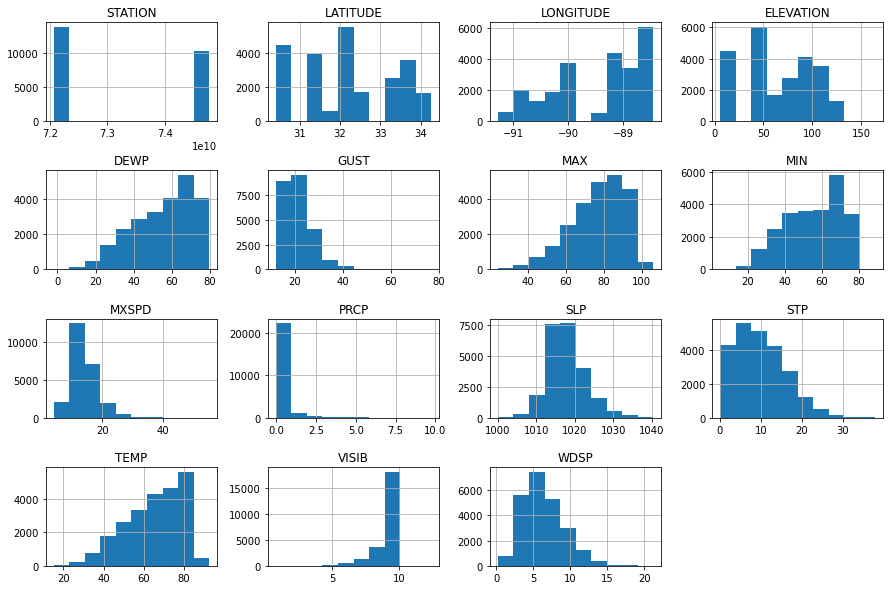

In [23]:
# plot histograms of each column without NaN values
weather_ms.dropna().hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

There doesn't seem to be anything too unusual here.

In [24]:
# check the maximum values one more time
weather_ms.describe()

,STATION,LATITUDE,LONGITUDE,ELEVATION,DEWP,GUST,MAX,MIN,MXSPD,PRCP,SLP,STP,TEMP,VISIB,WDSP
count,1.141810e+05,114181.000000,114181.000000,114181.000000,105721.000000,59757.000000,114100.000000,114121.000000,105390.000000,101199.000000,55700.000000,82017.000000,114181.000000,101800.000000,105749.000000
mean,7.550206e+10,32.705218,-89.547792,76.889328,55.284119,20.549256,76.203807,55.074828,11.502908,0.105491,1017.797619,10.148175,64.570901,9.101758,4.936017
std,8.196991e+09,1.450588,0.855613,41.644344,15.930522,6.099956,14.716436,15.615957,4.435724,0.382824,5.332479,6.107092,14.839165,1.284798,2.883238
min,7.205415e+10,30.350000,-91.283330,5.000000,-23.200000,9.900000,19.400000,-1.100000,1.000000,0.000000,986.100000,0.000000,8.700000,0.000000,0.000000
25%,7.221656e+10,31.606000,-90.346670,42.700000,43.500000,15.900000,66.200000,42.800000,8.000000,0.000000,1014.500000,5.400000,53.500000,8.700000,2.800000
50%,7.223589e+10,32.337800,-89.434800,80.500000,58.700000,19.000000,78.800000,57.200000,11.100000,0.000000,1017.200000,9.500000,67.300000,9.700000,4.400000
75%,7.475709e+10,33.873000,-88.744200,110.000000,69.100000,23.900000,88.000000,69.100000,14.000000,0.000000,1020.800000,14.100000,77.400000,10.000000,6.600000
max,9.999996e+10,34.978610,-88.416667,164.600000,87.600000,79.100000,109.400000,93.200000,55.000000,10.680000,1042.400000,38.600000,95.600000,13.900000,27.600000


These values look much better. Now I can quantify the missing data.

In [25]:
# check to see the number of missing values per column
weather_ms.isna().sum()

STATION          0
NAME             0
LATITUDE         0
LONGITUDE        0
ELEVATION        0
DATE             0
DEWP          8460
GUST         54424
MAX             81
MIN             60
MXSPD         8791
PRCP         12982
SLP          58481
STP          32164
TEMP             0
VISIB        12381
WDSP          8432
dtype: int64

In [26]:
# look at the rows with the most missing data
missing = pd.concat([weather_ms.isnull().sum(axis=1), 100 * weather_ms.isnull().mean(axis=1)], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending=False).head(10)

,count,%
112706,8,47.058824
56622,8,47.058824
57412,7,41.176471
57418,7,41.176471
57417,7,41.176471
57416,7,41.176471
57415,7,41.176471
57414,7,41.176471
57413,7,41.176471
57090,7,41.176471


In [27]:
# return the attributes for one of the stations with 8 missing values
weather_ms.iloc[112706]

STATION                   99999923803
NAME         HOLLY SPRINGS 4 N, MS US
LATITUDE                      34.8223
LONGITUDE                    -89.4348
ELEVATION                       147.5
DATE                       2016-12-18
DEWP                              NaN
GUST                              NaN
MAX                               NaN
MIN                              23.9
MXSPD                             NaN
PRCP                             0.47
SLP                               NaN
STP                               NaN
TEMP                             36.8
VISIB                             NaN
WDSP                              NaN
Name: 112706, dtype: object

This location still has min temperature, precipitation, and average temperature attributes, which will be helpful for the later modeling, so removing entire rows doesn't seem appropriate at this time.

In [28]:
# return % of rows for each count of missing values
missing['count'].value_counts(normalize=True, sort=False)

0    0.209220
1    0.376420
2    0.208450
3    0.114949
4    0.016561
5    0.002443
6    0.001524
7    0.070415
8    0.000018
Name: count, dtype: float64

About 79% of rows have some form of missing data which is not ideal. Over 77% of rows have 2 or less missing values though.

In [29]:
weather_ms.shape

(114181, 17)

In [30]:
tornado_ms.shape

(848, 30)

In [31]:
# save weather data
weather_ms.to_csv('/Users/gregoryolson/Documents/Data Science CT/Capstone/Capstone_Tornado/Data/weather_data_cleaned.csv')

In [32]:
# and save tornado data
tornado_ms.to_csv('/Users/gregoryolson/Documents/Data Science CT/Capstone/Capstone_Tornado/Data/tornado_data_cleaned.csv')

The datasets are now both much cleaner. The weather_ms data frame has missing values in the form of NaN. The tornado_ms data frame contains mostly description columns, that will potentially be used as keys to merge the two datasets. This will be the final step in the data wrangling process.

# Merging Tornado and Weather Data <a class="anchor" id="chapter4"></a>

In [33]:
# return each Station and the associated number of rows for each station
weather_ms.STATION.value_counts()

72235003940    4018
72234013865    4018
72332093862    4018
74757093874    4018
99999923803    4018
72330753893    4017
72235413927    4017
74758013978    4014
72235893919    4014
74768853858    4014
99999963831    4012
74759013833    4012
72234503866    4010
74768013939    4001
72330613825    3996
72234853808    3945
72235703961    3935
72054153806    3914
72213863852    3900
72236423903    3845
72216563808    3457
72092400311    3455
72092700314    3363
99817199999    3352
72078700278    3318
72502300474    2832
72076900275    2791
74694100389    2785
72093200317    2456
72235593999    2420
72077699999    1869
72076999999     679
74768199999     469
72235613939     212
72234713833     212
74768593874     212
72235913978     212
72234999999     191
72070853849     152
72097599999       5
72092499999       3
Name: STATION, dtype: int64

To avoid having too many missing values, I'm going to drop the weather data from every station that reported on less than half of the days throughout the 10 year period.

In [34]:
# drop the least populated Stations
station_drops = [72077699999, 72076999999, 74768199999, 72235613939, 72234999999, 72070853849, \
                 72097599999, 72092499999, 72234713833, 74768593874, 72235913978]
for station in station_drops:
    weather_ms = weather_ms[weather_ms.STATION != station]

In [35]:
# create list of unique weather stations
station_list = weather_ms.STATION.unique().tolist()

In [36]:
len(station_list)

30

Now I will create a function that creates 2 new columns for the tornado data frame. One column will contain the closest weather station to the tornado event, and the other will contain the distance from this station.

In [37]:
# make list for latitide, longitude of each station
lat_list = weather_ms.LATITUDE.unique().tolist()
lon_list = weather_ms.LONGITUDE.unique().tolist()

In [38]:
len(lat_list)

30

In [39]:
len(lon_list)

30

In [40]:
# create dataframe with station, latitude, and longitude as columns
station_loc = pd.DataFrame(
    {'Station': station_list,
     'Latitude': lat_list,
     'Longitude': lon_list
    })
station_loc.head()

,Station,Latitude,Longitude
0,72235893919,31.18270,-90.47080
1,72234853808,31.46667,-89.33333
2,72235593999,32.23333,-90.93333
3,74758013978,33.49630,-90.08660
4,74694100389,33.87300,-88.49000


In [41]:
# create function that inputs latitude and longitude values from tornado data frame, and then returns the station
# in which the point is closest to, along with the absolute distance from this station.
def nearest_station(lat, lon):
    ls = [] # initialize list for storing distances
    zipped = zip(lat_list, lon_list) # zip station lat and lon into series
    for stat_lat, stat_lon in zipped: # loop through each lat/lon set
        dist = sqrt(((stat_lat-lat)**2) + ((stat_lon-lon)**2)) # calculate distance
        ls.append(dist) # append each distance to ls
    station = station_loc.iloc[ls.index(min(ls))].Station # assign closest station to distance
    distance = min(ls) # distance between tornado event and closest station
    
    return station, distance

In [42]:
# test the function using sample latitude and longitude values
station, distance = nearest_station(31, -90)
print(station, ': ', distance)

72235893919.0 :  0.5050068613395241


In [43]:
# initialize empty lists that will be used to create new columns for tornado data frame
list1 = []
list2 = []

# put BEGIN_LAT and BEGIN_LON columns in seperate lists, then zip together for iteration
tornado_lat = tornado_ms.BEGIN_LAT.tolist()
tornado_lon = tornado_ms.BEGIN_LON.tolist()
zipped = zip(tornado_lat, tornado_lon)

# for each tornado event, add two new attributes: STATION and DIST_FROM_STATION
for lat, lon in zipped:
    station, distance = nearest_station(lat, lon)
    list1.append(int(station))
    list2.append(distance)
tornado_ms['STATION'] = list1
tornado_ms['DIST_FROM_STATION'] = list2
tornado_ms.head()

,EVENT_ID,CZ_NAME_STR,BEGIN_LOCATION,BEGIN_DATE,BEGIN_TIME,EVENT_TYPE,TOR_F_SCALE,STATE_ABBR,CZ_TIMEZONE,EPISODE_ID,CZ_TYPE,CZ_FIPS,WFO,SOURCE,TOR_LENGTH,TOR_WIDTH,BEGIN_RANGE,BEGIN_AZIMUTH,END_RANGE,END_AZIMUTH,END_LOCATION,END_DATE,END_TIME,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EVENT_NARRATIVE,EPISODE_NARRATIVE,ABSOLUTE_ROWNUMBER,STATION,DIST_FROM_STATION
0,210450,MADISON CO.,ROBINSON SPGS,01/20/2010,1801,Tornado,EF0,MS,CST-6,36238,C,89,JAN,NWS Storm Survey,0.96,40.0,2,SSW,1,SSE,ROBINSON SPGS,01/20/2010,1804,32.4755,-90.2386,32.4820,-90.2240,This weak tornado started along Coker Road whe...,Numerous severe storms developed over the ArkL...,1,72235413927,0.139893
1,210451,COPIAH CO.,SHADY GROVE,01/21/2010,50,Tornado,EF2,MS,CST-6,36238,C,29,JAN,NWS Storm Survey,3.61,500.0,3,SSW,3,ESE,SHADY GROVE,01/21/2010,55,31.8343,-90.3799,31.8612,-90.3272,"The tornado started along James Road, where se...",Numerous severe storms developed over the ArkL...,2,72093200317,0.230147
2,215576,SCOTT CO.,RAWORTH,03/11/2010,305,Tornado,EF1,MS,CST-6,37054,C,123,JAN,NWS Storm Survey,5.27,400.0,3,NNW,1,N,HILLSBORO,03/11/2010,312,32.4158,-89.5848,32.4707,-89.5221,The tornado started in the Bienville National ...,"A vigorous storm system, with strong low level...",3,72235003940,0.502028
3,215577,SCOTT CO.,HILLSBORO,03/11/2010,309,Tornado,EF1,MS,CST-6,37054,C,123,JAN,NWS Storm Survey,1.31,250.0,2,W,2,WNW,HILLSBORO,03/11/2010,311,32.4469,-89.5609,32.4614,-89.5463,The same parent supercell thunderstorm spawned...,"A vigorous storm system, with strong low level...",4,99999963831,0.502584
4,223390,LEFLORE CO.,NICHOLS,04/23/2010,1448,Tornado,EF1,MS,CST-6,38468,C,83,JAN,Emergency Manager,2.00,50.0,1,NNE,2,SE,PETEET,04/23/2010,1451,33.3366,-90.4158,33.3349,-90.3813,Several power lines were downed and one power ...,A potent weather disturbance brought showers a...,5,74758013978,0.365892


So far, I was able to write a function that took latitude and longitude values from a tornado event, and returned the closest station, as well as the distance from that station. It then called the function to fill in 2 new columns to the tornado_ms dataframe with the corresponding attributes. 

Next, I'm going to join the tornado_ms dataframe on the weather_ms dataframe, on DATE and STATION

I want to merge the data on DATE and STATION, so it is important to check that these values match up and are the same type

In [44]:
# check weather_ms STATION values
weather_ms.STATION.dtype

dtype('int64')

In [45]:
# and tornado_ms STATION values 
tornado_ms.STATION.dtype

dtype('int64')

The STATION columns are of the same type.

In [46]:
# convert DATE column of weather_ms to list
weather_ms.DATE.unique()

array(['2010-01-01', '2010-01-02', '2010-01-03', ..., '2011-07-01',
       '2011-07-02', '2011-07-03'], dtype=object)

In [47]:
# convert BEGIN_DATE column of tornado_ms to list
tornado_ms.BEGIN_DATE.unique()

array(['01/20/2010', '01/21/2010', '03/11/2010', '04/23/2010',
       '04/24/2010', '05/01/2010', '05/02/2010', '05/20/2010',
       '11/23/2010', '11/29/2010', '11/30/2010', '12/31/2010',
       '01/01/2011', '02/24/2011', '03/09/2011', '03/14/2011',
       '04/04/2011', '04/15/2011', '04/20/2011', '04/26/2011',
       '04/27/2011', '05/26/2011', '06/22/2011', '09/03/2011',
       '09/04/2011', '09/19/2011', '09/25/2011', '11/16/2011',
       '01/17/2012', '01/22/2012', '01/25/2012', '01/26/2012',
       '02/01/2012', '03/02/2012', '03/21/2012', '03/22/2012',
       '08/09/2012', '08/19/2012', '08/29/2012', '08/30/2012',
       '09/30/2012', '10/17/2012', '10/18/2012', '12/09/2012',
       '12/10/2012', '12/25/2012', '01/13/2013', '01/29/2013',
       '01/30/2013', '02/10/2013', '02/21/2013', '04/11/2013',
       '04/18/2013', '04/27/2013', '09/20/2013', '09/21/2013',
       '12/20/2013', '12/21/2013', '02/20/2014', '04/06/2014',
       '04/07/2014', '04/28/2014', '06/12/2014', '07/23

Need to convert times to identical format so that the dataframes can be joined on these values

In [48]:
# change both date columns to type datetime64 [ns]
tornado_ms['BEGIN_DATE'] = tornado_ms['BEGIN_DATE'].astype('datetime64[ns]')
weather_ms['DATE'] = weather_ms['DATE'].astype('datetime64[ns]')

In [49]:
# make a new column that contains the day prior to the date of the tornado event
tornado_ms['DAY_BEFORE'] = pd.DatetimeIndex(tornado_ms.BEGIN_DATE) + pd.DateOffset(-1)

This step was a preliminary step, because my first intent was to use data from the day prior to predict, but after looking at the correlations I found that this wasn't an effective approach. Likewise, I have gone through and created this seperate dataframe for the Day Prior Data Wrangling and EDA Notebook.

In [50]:
# now merge the two data frames using an outer join on each respective date and station attribute
tornado_merged = pd.merge(weather_ms, tornado_ms, left_on=['DATE', 'STATION'], right_on=['BEGIN_DATE', 'STATION'], how='outer')

In [51]:
# now merge the two data frames using an outer join on each respective date and station attribute
tornado_merged_1 = pd.merge(weather_ms, tornado_ms, left_on=['DATE', 'STATION'], right_on=['DAY_BEFORE', 'STATION'], how='outer')

In [52]:
# save tornado_merged_1 to use in new notebook
tornado_merged_1.to_csv('/Users/gregoryolson/Documents/Data Science CT/Capstone/Capstone_Tornado/Data/tornado_merged_1.csv', index = False)

In [53]:
# to see if the merge was succesful, check all of the rows where there is an event type Tornado
tornado_df = tornado_merged.loc[tornado_merged['EVENT_TYPE'] == 'Tornado']
tornado_df

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DEWP,GUST,MAX,MIN,MXSPD,PRCP,SLP,STP,TEMP,VISIB,WDSP,EVENT_ID,CZ_NAME_STR,BEGIN_LOCATION,BEGIN_DATE,BEGIN_TIME,EVENT_TYPE,TOR_F_SCALE,STATE_ABBR,CZ_TIMEZONE,EPISODE_ID,CZ_TYPE,CZ_FIPS,WFO,SOURCE,TOR_LENGTH,TOR_WIDTH,BEGIN_RANGE,BEGIN_AZIMUTH,END_RANGE,END_AZIMUTH,END_LOCATION,END_DATE,END_TIME,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EVENT_NARRATIVE,EPISODE_NARRATIVE,ABSOLUTE_ROWNUMBER,DIST_FROM_STATION,DAY_BEFORE
333,72235893919,"MCCOMB AIRPORT, MS US",31.1827,-90.4708,125.9,2010-11-30,55.5,28.9,72.0,42.1,22.9,0.73,1014.8,NaN,59.4,9.0,12.6,266424.0,AMITE CO.,BEECHWOOD,2010-11-30,250.0,Tornado,EF0,MS,CST-6,45941.0,C,5.0,LIX,NWS Storm Survey,4.81,25.0,4.0,ESE,3.0,W,PEORIA,11/30/2010,259.0,31.1100,-90.8089,31.1288,-90.7306,Sporadic tree and limb damage. Maximum wind sp...,A cold front moving across Mississippi trigger...,49.0,0.345828,2010-11-29
458,72235893919,"MCCOMB AIRPORT, MS US",31.1827,-90.4708,125.9,2011-04-04,68.2,39.0,84.0,59.0,22.0,0.00,1009.3,NaN,75.1,9.6,12.8,283274.0,LINCOLN CO.,RUTH,2011-04-04,1648.0,Tornado,EF1,MS,CST-6,48373.0,C,85.0,JAN,NWS Storm Survey,6.57,600.0,2.0,W,2.0,E,BRISTERVILLE,04/04/2011,1654.0,31.3800,-90.3554,31.3816,-90.2440,The tornado started by downing trees along Col...,A powerful storm system took shape across the ...,76.0,0.228570,2011-04-03
947,72235893919,"MCCOMB AIRPORT, MS US",31.1827,-90.4708,125.9,2012-08-09,73.0,38.1,91.0,70.0,22.9,0.00,1014.1,NaN,78.3,9.3,4.6,392869.0,WALTHALL CO.,MESA,2012-08-09,1507.0,Tornado,EF0,MS,CST-6,65621.0,C,147.0,LIX,NWS Storm Survey,0.33,170.0,2.0,N,3.0,N,MESA,08/09/2012,1515.0,31.1834,-90.2059,31.1878,-90.2036,Damage reported at St. Francis Animal Sanctuar...,An unseasonably strong cold front triggered th...,213.0,0.264901,2012-08-08
1070,72235893919,"MCCOMB AIRPORT, MS US",31.1827,-90.4708,125.9,2012-12-10,60.2,24.1,72.0,48.0,19.0,0.00,1011.1,NaN,62.8,8.4,9.4,415928.0,WALTHALL CO.,SIMONDS,2012-12-10,752.0,Tornado,EF1,MS,CST-6,69315.0,C,147.0,LIX,NWS Storm Survey,16.33,100.0,1.0,S,6.0,ENE,FLOWERS,12/10/2012,819.0,31.0100,-90.1800,31.1100,-89.9300,The tornado initially touched down near the in...,A cold front moving through southeast Louisian...,238.0,0.338216,2012-12-09
1071,72235893919,"MCCOMB AIRPORT, MS US",31.1827,-90.4708,125.9,2012-12-10,60.2,24.1,72.0,48.0,19.0,0.00,1011.1,NaN,62.8,8.4,9.4,420094.0,MARION CO.,PICKWICK,2012-12-10,819.0,Tornado,EF1,MS,CST-6,70007.0,C,91.0,JAN,NWS Storm Survey,2.84,100.0,5.0,WSW,2.0,W,PICKWICK,12/10/2012,825.0,31.1112,-89.9252,31.1348,-89.8859,Numerous trees were snapped and uprooted along...,A weak upper disturbance moved over the region...,239.0,0.550265,2012-12-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110409,72235593999,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,865206.0,WARREN CO.,ALLEN,2019-12-16,1126.0,Tornado,EF1,MS,CST-6,144130.0,C,149.0,JAN,NWS Storm Survey,2.83,400.0,2.0,S,3.0,E,ALLEN,12/16/2019,1131.0,32.0905,-90.9656,32.1124,-90.9247,This tornado began just west of the Mississipp...,"A well defined, positively-tilted trough exist...",321.0,0.146430,2019-12-15
110410,72235593999,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,865210.0,WARREN CO.,NEWMAN,2019-12-16,1148.0,Tornado,EF0,MS,CST-6,144130.0,C,149.0,JAN,NWS Storm Survey,3.80,50.0,5.0,WSW,2.0,W,NEWMAN,12/16/2019,1152.0,32.2043,-90.7831,32.2316,-90.7267,This EF-1 tornado began in a wooded area along...,"A well defined, positively-tilted trough exist...",322.0,0.153009,2019-12-15
110411,72235593999,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,865212.0,HINDS CO.,NEWMAN,2019-12-16,1152.0,Tornado,EF1,MS,CST-6,144130.0,C,49.0,JAN,NWS Storm Survey,18.52,616.0,2.0,W,3.0,SW,ORANGE HILL,12/16/2019,1224.0,32.2316,-90.7267,32.4326,-90.5169,This EF-1 tornado began in a wooded area along...,"A well defined,

Now that the dataframes are merged, let's make a new column that contains the distance of each storm from the closest weather station in miles, for future analysis.

In [54]:
# for each tornado event, take station lat/lon and event lat/lon and return the miles between them

R = 3963.0 # approximate radius of earth in miles
miles_ls = []
    
for stat_lat, stat_lon, lat, lon in zip(tornado_merged['LATITUDE'], tornado_merged['LONGITUDE'], \
                                        tornado_merged['BEGIN_LAT'], tornado_merged['BEGIN_LON']):
    
    dlon = radians(stat_lon) - radians(lon)
    dlat = radians(stat_lat) - radians(lat)

    a = sin(dlat / 2)**2 + cos(lat) * cos(stat_lat) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    miles_ls.append(distance)
    
tornado_merged['DISTANCE_MILES'] = miles_ls

The above code was found on StackOverflow, provided by Michael0x2a, https://stackoverflow.com/questions/19412462/getting-distance-between-two-points-based-on-latitude-longitude

In [55]:
# drop the DIST_FROM_STATION row
tornado_merged.drop('DIST_FROM_STATION', axis=1, inplace=True)

In [56]:
tornado_merged.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DEWP,GUST,MAX,MIN,MXSPD,PRCP,SLP,STP,TEMP,VISIB,WDSP,EVENT_ID,CZ_NAME_STR,BEGIN_LOCATION,BEGIN_DATE,BEGIN_TIME,EVENT_TYPE,TOR_F_SCALE,STATE_ABBR,CZ_TIMEZONE,EPISODE_ID,CZ_TYPE,CZ_FIPS,WFO,SOURCE,TOR_LENGTH,TOR_WIDTH,BEGIN_RANGE,BEGIN_AZIMUTH,END_RANGE,END_AZIMUTH,END_LOCATION,END_DATE,END_TIME,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EVENT_NARRATIVE,EPISODE_NARRATIVE,ABSOLUTE_ROWNUMBER,DAY_BEFORE,DISTANCE_MILES
0,72235893919,"MCCOMB AIRPORT, MS US",31.1827,-90.4708,125.9,2010-01-01,37.7,19.0,53.1,39.9,13.0,0.12,1024.1,8.8,45.8,8.4,8.5,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
1,72235893919,"MCCOMB AIRPORT, MS US",31.1827,-90.4708,125.9,2010-01-02,27.0,NaN,48.9,30.0,7.0,0.08,1027.9,12.2,38.1,9.4,5.0,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
2,72235893919,"MCCOMB AIRPORT, MS US",31.1827,-90.4708,125.9,2010-01-03,19.3,NaN,46.9,28.0,7.0,0.00,1025.6,10.0,35.8,10.0,4.4,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
3,72235893919,"MCCOMB AIRPORT, MS US",31.1827,-90.4708,125.9,2010-01-04,20.2,20.0,39.9,28.9,15.0,0.00,1026.2,10.5,33.6,10.0,6.4,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
4,72235893919,"MCCOMB AIRPORT, MS US",31.1827,-90.4708,125.9,2010-01-05,14.9,19.0,42.1,17.1,12.0,0.00,1029.4,13.6,28.9,9.4,5.4,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN


Now the distance column makes sense, and is not just an arbitrary number

In [57]:
# see how many tornado events have no corresponding weather data
len(tornado_merged.loc[tornado_merged['NAME'].isnull()])

92

There seem to be 92 rows in which the tornado data have no associated weather data for day of. 

In [58]:
# let's look at the columns
tornado_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110414 entries, 0 to 110413
Data columns (total 49 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   STATION             110414 non-null  int64         
 1   NAME                110322 non-null  object        
 2   LATITUDE            110322 non-null  float64       
 3   LONGITUDE           110322 non-null  float64       
 4   ELEVATION           110322 non-null  float64       
 5   DATE                110322 non-null  datetime64[ns]
 6   DEWP                101802 non-null  float64       
 7   GUST                57649 non-null   float64       
 8   MAX                 110283 non-null  float64       
 9   MIN                 110303 non-null  float64       
 10  MXSPD               101515 non-null  float64       
 11  PRCP                97714 non-null   float64       
 12  SLP                 54463 non-null   float64       
 13  STP                 81274 non

Now let's get a look at each station, and see how many storms have no associated weather data per station.

In [59]:
# look at each station id and see if it is located in a row in which there is a tornado but no weather data
stations = tornado_merged.STATION.unique().tolist()
for station in stations:
    tornado_df = tornado_merged.loc[(tornado_merged['EVENT_TYPE'] == 'Tornado') & \
                                    (tornado_merged['STATION'] == station) & \
                                    (tornado_merged['NAME'].isna())] 
    
    tornado_df2 = tornado_merged.loc[(tornado_merged['EVENT_TYPE'] == 'Tornado') & \
                                    (tornado_merged['STATION'] == station)]
    
    print(station, ': ', len(tornado_df), len(tornado_df2))

72235893919 :  0 30
72234853808 :  0 73
72235593999 :  21 38
74758013978 :  0 48
74694100389 :  9 14
99817199999 :  0 1
72092400311 :  2 22
72332093862 :  0 21
72234013865 :  0 23
72236423903 :  0 5
74768013939 :  0 18
74757093874 :  0 18
72235413927 :  0 24
72235703961 :  1 14
99999963831 :  0 94
72093200317 :  17 36
72330613825 :  0 8
72502300474 :  8 17
72216563808 :  0 3
74768853858 :  0 19
72078700278 :  8 43
74759013833 :  0 47
72092700314 :  2 11
72054153806 :  0 15
72330753893 :  1 20
72076900275 :  23 58
72213863852 :  0 20
72235003940 :  0 81
72234503866 :  0 21
99999923803 :  0 6


In [60]:
# drop the 92 rows
indexNames = tornado_merged[tornado_merged['NAME'].isnull()].index
tornado_merged.drop(indexNames, inplace=True)

The tornado_merged dataframe now has 92 fewer rows, and every tornado event has associated weather data.

In [61]:
tornado_merged.shape

(110322, 49)

In [62]:
# save new dataset
tornado_merged.to_csv('/Users/gregoryolson/Documents/Data Science CT/Capstone/Capstone_Tornado/Data/tornado_final.csv', index = False)